In [7]:
import numpy as np
from scipy.stats import sem

# import my functions
# import info_theory_functions as info
from lnl_model_functions import *
from atick_redlich_functions import *
from get_davids_data import *
from image_processing_functions import *

# from scipy.optimize import minimize
# from scipy import fft, arange
# from random import randint
# from cmath import polar
# from numpy.fft import fft2
# from numpy.fft import fftshift
# from sklearn.decomposition import PCA
# from scipy.interpolate import interp1d
from scipy.optimize import curve_fit, minimize
from scipy.stats import sem
from scipy.interpolate import interp1d


# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
from matplotlib.pyplot import *

# note that nonposx(y) for log plots will no longer work with this package
# I recommend against enabling the whole notebook, since some plots come out funny.
# Instead, just use mpld3.display() at the end of cells you want to interact with.
import mpld3
#mpld3.enable_notebook()

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import natural images

In [5]:
# choose an image path from cd13A (flood plain, water, horizon) or cd01A (baboons, trees, bushes)
im_path     = '/Users/lmcintosh/data/images/Tkacik/cd13A' # flood plain, water, horizon
num_images  = 100
patch_size  = None
pixelsToDeg = 92./2 # or 2./92 degrees per pixel (spacing)
spacing     = 1./pixelsToDeg # number of degree spacing between pixels
normalize   = 'divisive'
contrast    = 0.35
patches     = load_images(im_path, num_images, patch_size, square=True, 
                          normalize=normalize, effective_contrast=contrast)

Only 78 files in directory.


In [6]:
allRot  = [spectrum2d(p,spacing=spacing,frequencyFlag=False) for p in patches]
specRot = np.mean(allRot, axis=0) # average out the amplitude spectrum over all images
frqRot, tmp = spectrum2d(patches[0],spacing=spacing,frequencyFlag=True)
error = [sem([allRot[j][i] for j in range(len(patches))]) for i in range(len(frqRot))]
originalSpectra = specRot
originalErrors  = error
originalFreqs   = frqRot

# Ideal curve with full model

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


The relative error from this choice of Lagrangian multiplier is 1.43022183525e-07.


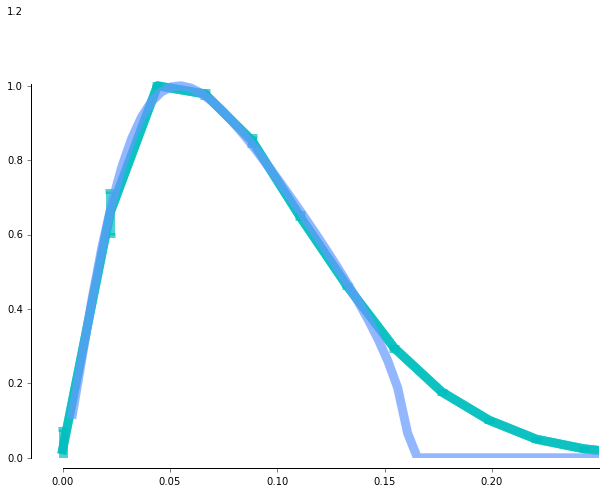

In [8]:
freq_ideal, filt_ideal, freq_expt_both, filt_expt_both, both_freqs, both_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                     inputNoise=0.12, outputNoise=0.35,
                                                                     center_weighting=7.7844, surround_weighting=.5085,
                                                                     horz_weighting=.223, ama_weighting=1.165,
                                                                     center_width=1.86945,
                                                                     returnFlag=True, xlimit=[-0.01,0.25], 
                                                                     numPoints=5000, plotFlag='aggregate',
                                                                                       statistics=True)

# Ideal curve with horizontal cell model

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


The relative error from this choice of Lagrangian multiplier is 3.0147009994e-07.


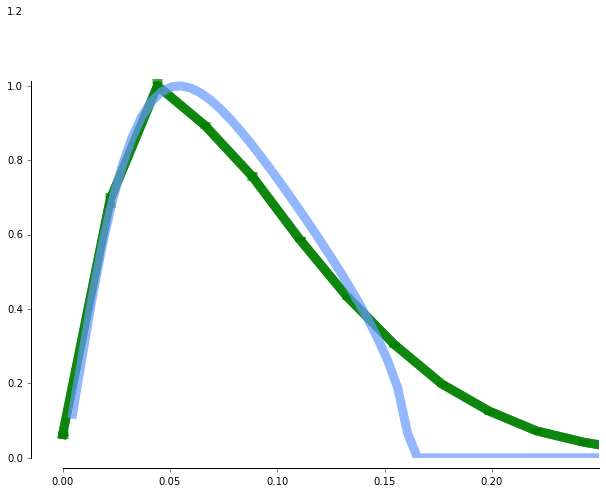

In [78]:
freq_ideal, filt_ideal, freq_expt_h, filt_expt_h, h_freqs, h_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                     inputNoise=0.12, outputNoise=0.35,
                                                                     center_weighting=6., surround_weighting=.45,
                                                                     horz_weighting=.85, ama_weighting=0.,
                                                                     center_width=1.7,
                                                                     returnFlag=True, xlimit=[-0.01,0.25], 
                                                                     numPoints=5000, plotFlag='aggregate',
                                                                     aggregateColor='g', statistics=True)

# Ideal curve with amacrine cell model

The relative error from this choice of Lagrangian multiplier is 2.52828918319e-08.


/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


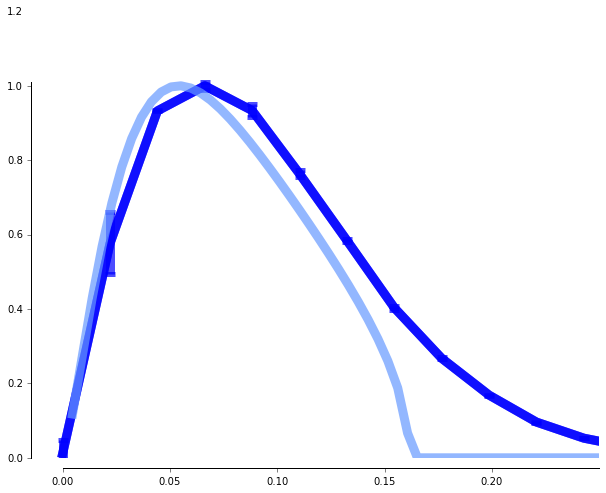

In [10]:
freq_ideal, filt_ideal, freq_expt_a, filt_expt_a, a_freqs, a_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                     inputNoise=0.12, outputNoise=0.35,
                                                                     center_weighting=6., surround_weighting=.45,
                                                                     horz_weighting=0., ama_weighting=1.5,
                                                                     center_width=1.7,
                                                                     returnFlag=True, xlimit=[-0.01,0.25], 
                                                                     numPoints=5000, plotFlag='aggregate',
                                                                     aggregateColor='b', statistics=True)

# All of these overlaid

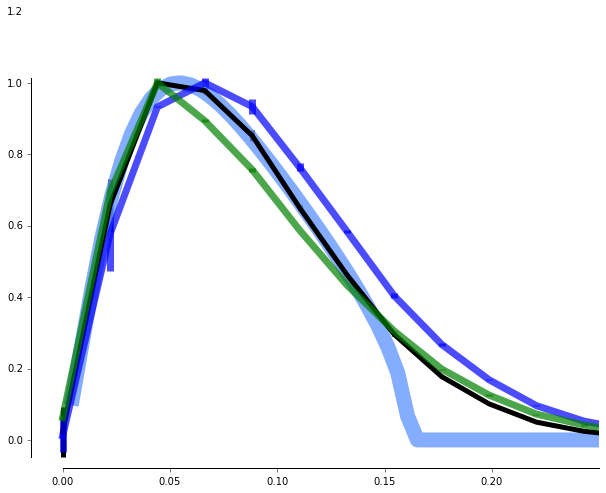

In [12]:
plt.plot(freq_ideal, filt_ideal/np.nanmax(filt_ideal), color='#6699ff', linewidth=15, alpha=0.8)
plt.errorbar(freq_expt_both, filt_expt_both/np.nanmax(filt_expt_both), yerr=sem(both_ffts/np.nanmax(filt_expt_both)), 
             color='k', linewidth=5, alpha=1.0, capthick=5, capsize=0)
plt.errorbar(freq_expt_a, filt_expt_a/np.nanmax(filt_expt_a), yerr=sem(a_ffts/np.nanmax(filt_expt_a)),
            color='b', alpha=0.7, linewidth=7, capthick=5, capsize=0)
plt.errorbar(freq_expt_h, filt_expt_h/np.nanmax(filt_expt_h), yerr=sem(h_ffts/np.nanmax(filt_expt_h)),
            color='g', alpha=0.7, linewidth=7, capthick=5, capsize=0)
plt.xlim([-0.01,0.25])
plt.ylim([-0.05, 1.2])
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.savefig('Fig4B-C_one_plot.pdf', fonttype=42)

# Signal

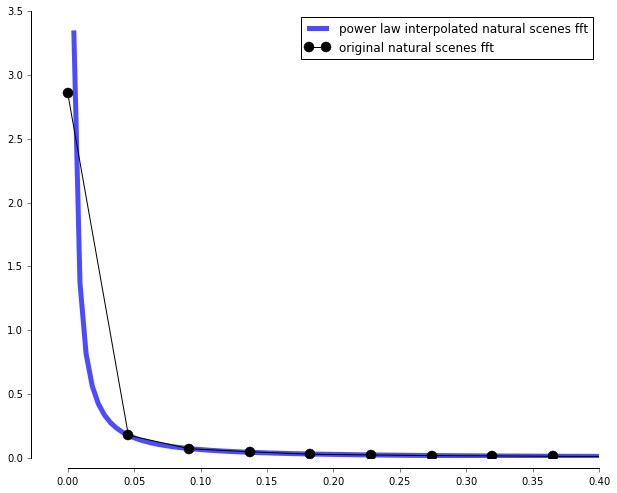

In [13]:
# interpolate signal amplitude
# power law
def func(x, a, b):
    return a/(x**b) # adding a constant tends to make moreSpectra have negative numbers
popt, pcov  = curve_fit(func, originalFreqs[1:], originalSpectra[1:])
more_signal_freq   = np.linspace(0., originalFreqs[-1], 5000)[1:]
more_signal_amp = func(more_signal_freq, *popt)

plt.plot(more_signal_freq, more_signal_amp, 'b', linewidth=5, alpha=0.7, label='power law interpolated natural scenes fft')
plt.plot(originalFreqs, originalSpectra, 'k.-', markersize=20, label='original natural scenes fft')
plt.legend()
plt.xlim([-0.02,0.4])
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
adjust_spines(plt.gca(), ['left', 'bottom'])

# Find constants to ensure output variance of interpoalted filters are identical

In [24]:
input_noise = 0.12
output_noise = 0.35

In [65]:
model_const = 0.905
a_const = 0.84
h_const = 0.9

In [47]:
filt_ideal/np.nanmax(filt_ideal)

array([ 0.11766971,  0.27450415,  0.42973935, ...,  0.        ,
        0.        ,  0.        ])

In [48]:
np.min(np.array(more_signal_freq) == np.array(freq_ideal))

True

## Variances

In [49]:
output_variance = np.sum((more_signal_amp*filt_ideal/np.nanmax(filt_ideal))**2 +
                          (input_noise * filt_ideal/np.nanmax(filt_ideal))**2 +
                          (output_noise)**2)
print(output_variance)

613.601287885


In [50]:
ideal_filter_interp = interp1d(freq_ideal, filt_ideal/np.nanmax(filt_ideal), kind='slinear')
output_variance = np.sum((more_signal_amp*ideal_filter_interp(more_signal_freq))**2 +
                          (input_noise * ideal_filter_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(output_variance)

613.601287885


In [87]:
# model_interp = interp1d(freq_expt_both, filt_expt_both/np.nanmax(filt_expt_both), kind='linear', 
#                         fill_value="extrapolate", bounds_error=False)
model_interp = interp1d(freq_expt_both, filt_expt_both/np.nanmax(filt_expt_both), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

model_variance = np.sum((more_signal_amp*model_const*model_interp(more_signal_freq))**2 +
                          (input_noise * model_const * model_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(model_variance)

613.45753196


In [88]:
# a_interp = interp1d(freq_expt_both, filt_expt_a/np.nanmax(filt_expt_a), kind='linear', 
#                         fill_value="extrapolate", bounds_error=False)
a_interp = interp1d(freq_expt_both, filt_expt_a/np.nanmax(filt_expt_a), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

a_variance = np.sum((more_signal_amp*a_const*a_interp(more_signal_freq))**2 +
                          (input_noise * a_const * a_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(a_variance)

613.172542809


In [89]:
# h_interp = interp1d(freq_expt_both, filt_expt_h/np.nanmax(filt_expt_h), kind='linear', 
#                         fill_value="extrapolate", bounds_error=False)
h_interp = interp1d(freq_expt_both, filt_expt_h/np.nanmax(filt_expt_h), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

h_variance = np.sum((more_signal_amp*h_const*h_interp(more_signal_freq))**2 +
                          (input_noise * h_const * h_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(h_variance)

613.615126339


### Information

In [90]:
ideal_info = np.sum(0.5*np.log2(1+ ((more_signal_amp*ideal_filter_interp(more_signal_freq))**2)/((input_noise*ideal_filter_interp(more_signal_freq))**2 + output_noise**2)))
print(ideal_info)

4.12362903341


In [91]:
model_info = np.sum(0.5*np.log2(1+ ((more_signal_amp*model_const*model_interp(more_signal_freq))**2)/((input_noise*model_const*model_interp(more_signal_freq))**2 + output_noise**2)))
print(model_info)

3.70432562792


In [92]:
a_info = np.sum(0.5*np.log2(1+ ((more_signal_amp*a_const*a_interp(more_signal_freq))**2)/((input_noise*a_const*a_interp(more_signal_freq))**2 + output_noise**2)))
print(a_info)

2.79462805107


In [93]:
h_info = np.sum(0.5*np.log2(1+ ((more_signal_amp*h_const*h_interp(more_signal_freq))**2)/((input_noise*h_const*h_interp(more_signal_freq))**2 + output_noise**2)))
print(h_info)

4.07137440643


### Why is the horizontal cell model have such relatively high information??

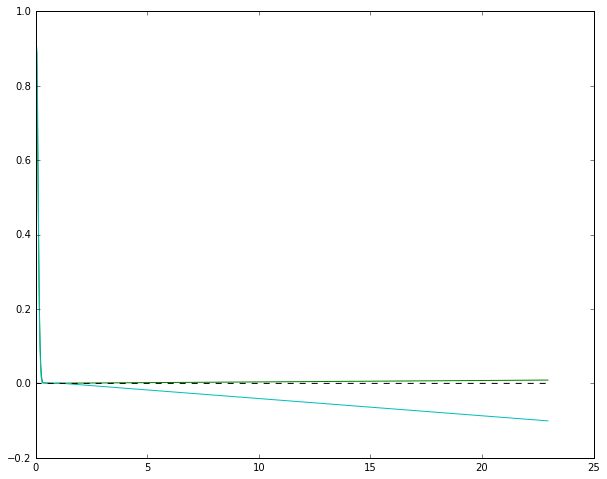

In [86]:
plt.plot(more_signal_freq, h_const * h_interp(more_signal_freq), 'g')
plt.plot(more_signal_freq, model_const * model_interp(more_signal_freq), 'c')
# plt.plot(more_signal_freq, ideal_filter_interp(more_signal_freq), 'k')
plt.plot(more_signal_freq, len(more_signal_freq)*[0.0], 'k--')

## Well there is a problem!  
Need to ensure all points are $\geq$ 0

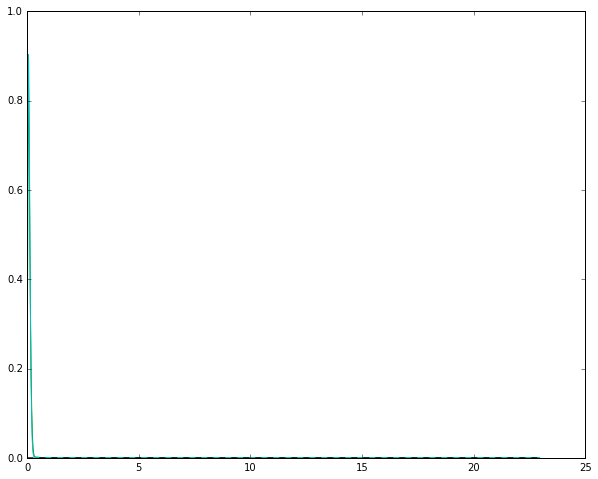

In [94]:
plt.plot(more_signal_freq, h_const * h_interp(more_signal_freq), 'g')
plt.plot(more_signal_freq, model_const * model_interp(more_signal_freq), 'c')
# plt.plot(more_signal_freq, ideal_filter_interp(more_signal_freq), 'k')
plt.plot(more_signal_freq, len(more_signal_freq)*[0.0], 'k--')

## Even with slinear interpolation filling all new values to 0.0 results in very similar information levels, with horizontal cell model still higher than model

(0, 1)

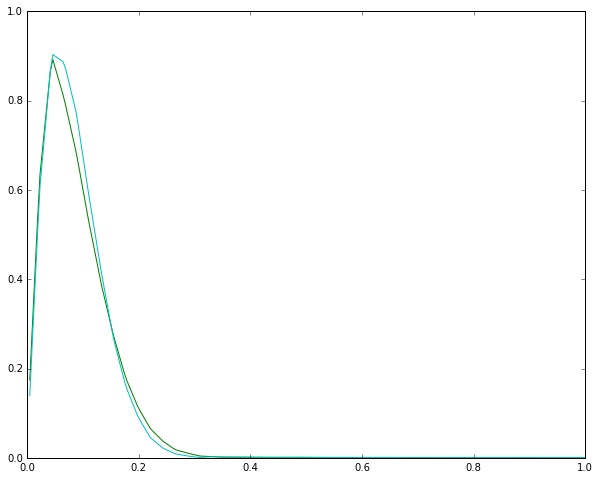

In [95]:
plt.plot(more_signal_freq, h_const * h_interp(more_signal_freq), 'g')
plt.plot(more_signal_freq, model_const * model_interp(more_signal_freq), 'c')
# plt.plot(more_signal_freq, ideal_filter_interp(more_signal_freq), 'k')
plt.plot(more_signal_freq, len(more_signal_freq)*[0.0], 'k--')
plt.xlim([0,1])

## Still missing some significant power at low frequency. Try sampling frequencies at higher number

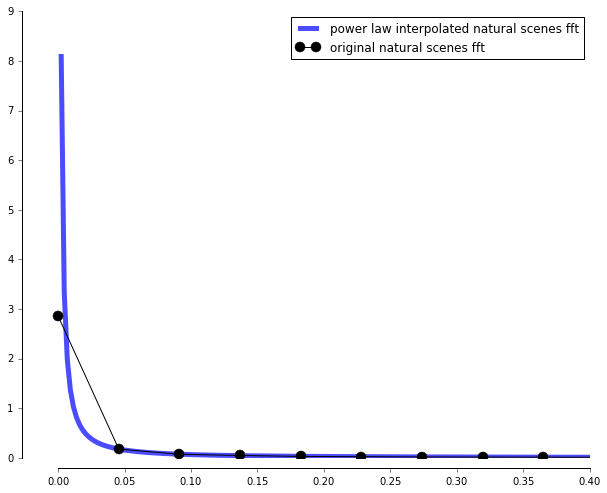

In [96]:
# interpolate signal amplitude
# power law
npoints = 10000
popt, pcov  = curve_fit(func, originalFreqs[1:], originalSpectra[1:])
more_signal_freq   = np.linspace(0., originalFreqs[-1], npoints)[1:]
more_signal_amp = func(more_signal_freq, *popt)

plt.plot(more_signal_freq, more_signal_amp, 'b', linewidth=5, alpha=0.7, label='power law interpolated natural scenes fft')
plt.plot(originalFreqs, originalSpectra, 'k.-', markersize=20, label='original natural scenes fft')
plt.legend()
plt.xlim([-0.02,0.4])
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
adjust_spines(plt.gca(), ['left', 'bottom'])

In [98]:
more_signal_freq[0]

0.0022956660745439626

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


The relative error from this choice of Lagrangian multiplier is 1.30487542266e-07.


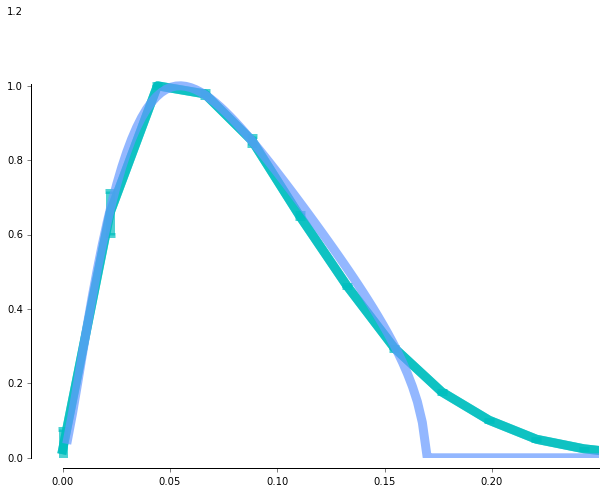

In [99]:
freq_ideal, filt_ideal, freq_expt_both, filt_expt_both, both_freqs, both_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                     inputNoise=0.12, outputNoise=0.35,
                                                                     center_weighting=7.7844, surround_weighting=.5085,
                                                                     horz_weighting=.223, ama_weighting=1.165,
                                                                     center_width=1.86945,
                                                                     returnFlag=True, xlimit=[-0.01,0.25], 
                                                                     numPoints=10000, plotFlag='aggregate',
                                                                                       statistics=True)

In [143]:
model_const = 0.927
a_const = 1.02
h_const = 0.81

In [101]:
ideal_filter_interp = interp1d(freq_ideal, filt_ideal/np.nanmax(filt_ideal), kind='slinear')
output_variance = np.sum((more_signal_amp*ideal_filter_interp(more_signal_freq))**2 +
                          (input_noise * ideal_filter_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(output_variance)

1227.44817883


In [128]:
# model_interp = interp1d(freq_expt_both, filt_expt_both/np.nanmax(filt_expt_both), kind='linear', 
#                         fill_value="extrapolate", bounds_error=False)
model_interp = interp1d(freq_expt_both, filt_expt_both/np.nanmax(filt_expt_both), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

model_variance = np.sum((more_signal_amp*model_const*model_interp(more_signal_freq))**2 +
                          (input_noise * model_const * model_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(model_variance)

1227.44603828


In [144]:
# a_interp = interp1d(freq_expt_both, filt_expt_a/np.nanmax(filt_expt_a), kind='linear', 
#                         fill_value="extrapolate", bounds_error=False)
a_interp = interp1d(freq_expt_both, filt_expt_a/np.nanmax(filt_expt_a), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

a_variance = np.sum((more_signal_amp*a_const*a_interp(more_signal_freq))**2 +
                          (input_noise * a_const * a_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(a_variance)

1227.4460618


In [116]:
# h_interp = interp1d(freq_expt_both, filt_expt_h/np.nanmax(filt_expt_h), kind='linear', 
#                         fill_value="extrapolate", bounds_error=False)
h_interp = interp1d(freq_expt_both, filt_expt_h/np.nanmax(filt_expt_h), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

h_variance = np.sum((more_signal_amp*h_const*h_interp(more_signal_freq))**2 +
                          (input_noise * h_const * h_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(h_variance)

1227.41697552


## Interesting how much the model constants for equitable variance depend on the frequency range

In [145]:
ideal_info = np.sum(0.5*np.log2(1+ ((more_signal_amp*ideal_filter_interp(more_signal_freq))**2)/((input_noise*ideal_filter_interp(more_signal_freq))**2 + output_noise**2)))
print(ideal_info)

8.62305345843


In [146]:
model_info = np.sum(0.5*np.log2(1+ ((more_signal_amp*model_const*model_interp(more_signal_freq))**2)/((input_noise*model_const*model_interp(more_signal_freq))**2 + output_noise**2)))
print(model_info)

8.35567816287


In [147]:
a_info = np.sum(0.5*np.log2(1+ ((more_signal_amp*a_const*a_interp(more_signal_freq))**2)/((input_noise*a_const*a_interp(more_signal_freq))**2 + output_noise**2)))
print(a_info)

8.18913162676


In [148]:
h_info = np.sum(0.5*np.log2(1+ ((more_signal_amp*h_const*h_interp(more_signal_freq))**2)/((input_noise*h_const*h_interp(more_signal_freq))**2 + output_noise**2)))
print(h_info)

7.85881538592


## We really want to investigate the low frequency regime where the model filters are most different, and where the divergence from the ideal filter won't be as large  

We don't need to change the interpolations

In [153]:
cutoff_freq = 0.4
lower_freqs = np.array([f for f in more_signal_freq if f <= cutoff_freq])
lower_amps = np.array([a for ida,a in enumerate(more_signal_amp) if more_signal_freq[ida] <= cutoff_freq])
print('%d total freqs' %(len(lower_freqs)))
print('%d total amplitudes' %(len(lower_amps)))

174 total freqs
174 total amplitudes


In [154]:
output_variance = np.sum((lower_amps*ideal_filter_interp(lower_freqs))**2 +
                          (input_noise * ideal_filter_interp(lower_freqs))**2 +
                          (output_noise)**2)
print(output_variance)

23.8856788259


In [155]:
model_variance = np.sum((lower_amps*model_const*model_interp(lower_freqs))**2 +
                          (input_noise * model_const * model_interp(lower_freqs))**2 +
                          (output_noise)**2)
print(model_variance)

23.8835361446


In [156]:
a_variance = np.sum((lower_amps*a_const*a_interp(lower_freqs))**2 +
                          (input_noise * a_const * a_interp(lower_freqs))**2 +
                          (output_noise)**2)
print(a_variance)

23.8835585794


In [157]:
h_variance = np.sum((lower_amps*h_const*h_interp(lower_freqs))**2 +
                          (input_noise * h_const * h_interp(lower_freqs))**2 +
                          (output_noise)**2)
print(h_variance)

23.8544737247


### infos

In [158]:
ideal_info = np.sum(0.5*np.log2(1+ ((lower_amps*ideal_filter_interp(lower_freqs))**2)/((input_noise*ideal_filter_interp(lower_freqs))**2 + output_noise**2)))
print(ideal_info)

8.62305345843


In [159]:
model_info = np.sum(0.5*np.log2(1+ ((lower_amps*model_const*model_interp(lower_freqs))**2)/((input_noise*model_const*model_interp(lower_freqs))**2 + output_noise**2)))
print(model_info)

8.35567811554


In [160]:
a_info = np.sum(0.5*np.log2(1+ ((lower_amps*a_const*a_interp(lower_freqs))**2)/((input_noise*a_const*a_interp(lower_freqs))**2 + output_noise**2)))
print(a_info)

8.18913156271


In [161]:
h_info = np.sum(0.5*np.log2(1+ ((lower_amps*h_const*h_interp(lower_freqs))**2)/((input_noise*h_const*h_interp(lower_freqs))**2 + output_noise**2)))
print(h_info)

7.8588153459


## An interesting way to plot this might be to have a cumulative information plot, so that we can see the both the frequencies at which the information rate changes, and the absolute information difference

In [162]:
input_noise

0.12

In [163]:
output_noise

0.35

In [166]:
def info_at_freq(freqs, signal_amplitude, filter_interpolation_function, function_const=1., input_noise=0.12, output_noise=0.35):
    numerator = (signal_amplitude * function_const * filter_interpolation_function(freqs))**2
    denominator = ((input_noise * function_const * filter_interpolation_function(freqs))**2 + output_noise**2)
    return 0.5*np.log2(1 + (numerator/denominator))

In [167]:
cuminfo_ideal = info_at_freq(lower_freqs, lower_amps, ideal_filter_interp)
cuminfo_model = info_at_freq(lower_freqs, lower_amps, model_interp, function_const=model_const)
cuminfo_a = info_at_freq(lower_freqs, lower_amps, a_interp, function_const=a_const)
cuminfo_h = info_at_freq(lower_freqs, lower_amps, h_interp, function_const=h_const)

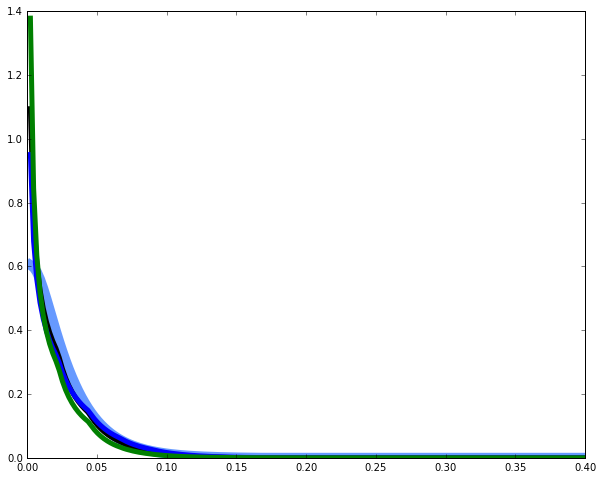

In [170]:
plt.plot(lower_freqs, cuminfo_ideal, color='#6699ff', linewidth=10, label='ideal')
plt.plot(lower_freqs, cuminfo_model, color='k', linewidth=5, label='model')
plt.plot(lower_freqs, cuminfo_a, color='b', linewidth=5, label='amacrine')
plt.plot(lower_freqs, cuminfo_h, color='g', linewidth=5, label='horizontal')

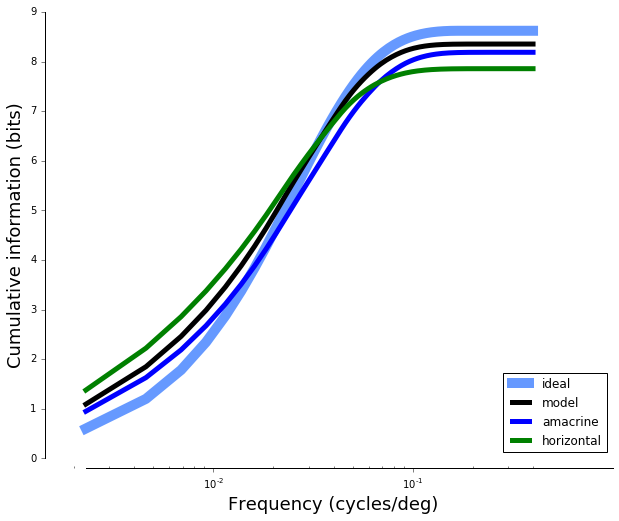

In [194]:
plt.plot(lower_freqs, np.cumsum(cuminfo_ideal), color='#6699ff', linewidth=10, label='ideal')
plt.plot(lower_freqs, np.cumsum(cuminfo_model), color='k', linewidth=5, label='model')
plt.plot(lower_freqs, np.cumsum(cuminfo_a), color='b', linewidth=5, label='amacrine')
plt.plot(lower_freqs, np.cumsum(cuminfo_h), color='g', linewidth=5, label='horizontal')
plt.xlabel('Frequency (cycles/deg)', fontsize=18)
plt.ylabel('Cumulative information (bits)', fontsize=18)
plt.legend(loc='lower right')
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
plt.xscale('log')
plt.xlim([1.6*10e-4, 10e-1])
adjust_spines(plt.gca(), ['left', 'bottom'])

## Increase points to get higher resolution

The relative error from this choice of Lagrangian multiplier is 8.14995764308e-08.


/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


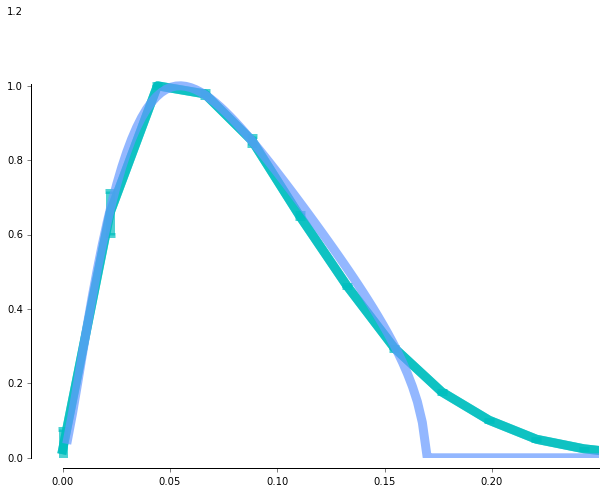

In [199]:
freq_ideal, filt_ideal, freq_expt_both, filt_expt_both, both_freqs, both_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                     inputNoise=0.12, outputNoise=0.35,
                                                                     center_weighting=7.7844, surround_weighting=.5085,
                                                                     horz_weighting=.223, ama_weighting=1.165,
                                                                     center_width=1.86945,
                                                                     returnFlag=True, xlimit=[-0.01,0.25], 
                                                                     numPoints=10000, plotFlag='aggregate',
                                                                                       statistics=True)

## Use function for finding the ideal model without specifying the weightings

(0, 0.4)

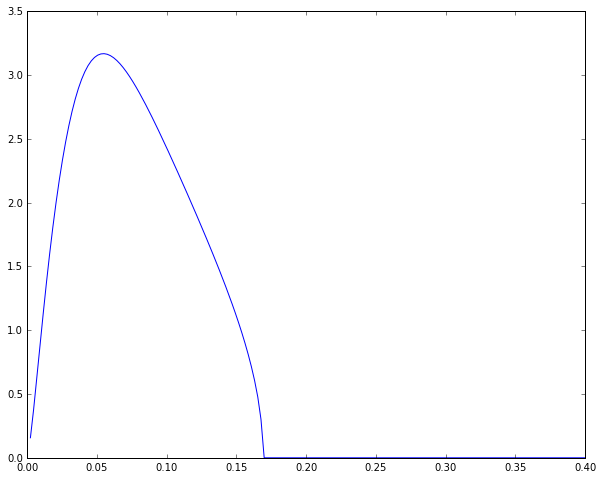

In [221]:
plt.plot(freq_ideal, filt_ideal)
plt.xlim([0,0.4])

In [230]:
freqs, ideal_fft, horz_weight, ama_weight, center_weight, surround_weight, center_width = fit_ideal(freq_ideal, filt_ideal, returnFlag='all')

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]


In [231]:
print('Horizontal weight is %f, Amacrine weight is %f' %(horz_weight, ama_weight))
print('Center weight is %f, Surround weight is %f' %(center_weight, surround_weight))
print('Center is %f std wide' %center_width)

Horizontal weight is -0.518264, Amacrine weight is 2.115199
Center weight is 7.647870, Surround weight is 0.248688
Center is 1.166699 std wide


(0, 0.4)

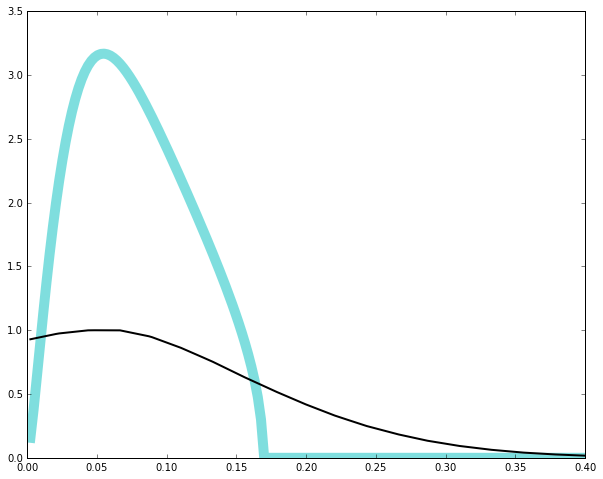

In [232]:
plt.plot(freq_ideal, filt_ideal, color='c', linewidth=10, alpha=0.5)
plt.plot(freqs, ideal_fft, 'k', linewidth=2)
plt.xlim([0,.4])

In [237]:
np.max(lower_freqs)

0.39944589697064947

In [307]:
lowerer_freqs = [f for f in lower_freqs if f < 0.15]
freqs, model_fft, horz_weight, ama_weight, center_weight, surround_weight, center_width = fit_ideal(lowerer_freqs, 
                                                                                                    ideal_filter_interp(lowerer_freqs), returnFlag='all')
print('Horizontal weight is %f, Amacrine weight is %f' %(horz_weight, ama_weight))
print('Center weight is %f, Surround weight is %f' %(center_weight, surround_weight))
print('Center is %f std wide' %center_width)

Horizontal weight is 0.276894, Amacrine weight is 0.757647
Center weight is 4.838130, Surround weight is 0.424945
Center is 1.751050 std wide


/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]


(0, 0.4)

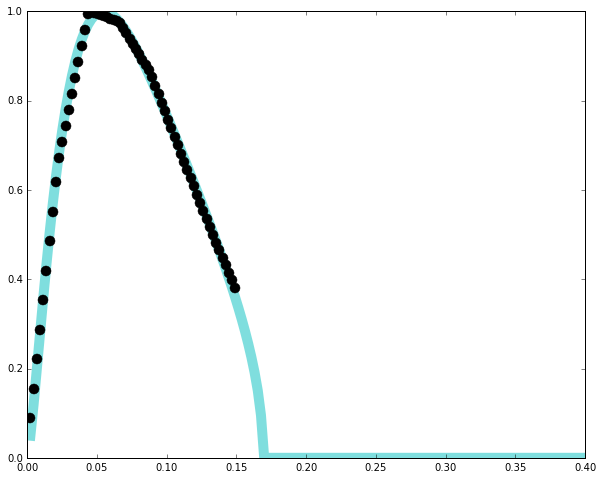

In [308]:
plt.plot(freq_ideal, filt_ideal/np.nanmax(filt_ideal), color='c', linewidth=10, alpha=0.5)
plt.plot(freqs, model_fft, 'k.', linewidth=2, markersize=20)
plt.xlim([0,.4])

In [309]:
lowerer_freqs = [f for f in lower_freqs if f < 0.15]
freqs, ideal_fft, center_weight, surround_weight, center_width = fit_ideal_horz_only(lowerer_freqs, 
                                                                                                    ideal_filter_interp(lowerer_freqs), returnFlag='all')
print('Horizontal weight is %f, Amacrine weight is %f' %(1.0, 0.0))
print('Center weight is %f, Surround weight is %f' %(center_weight, surround_weight))
print('Center is %f std wide' %center_width)

Horizontal weight is 1.000000, Amacrine weight is 0.000000
Center weight is -4293.667490, Surround weight is -324.616352
Center is 1.499641 std wide


/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:700: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]


(0, 0.4)

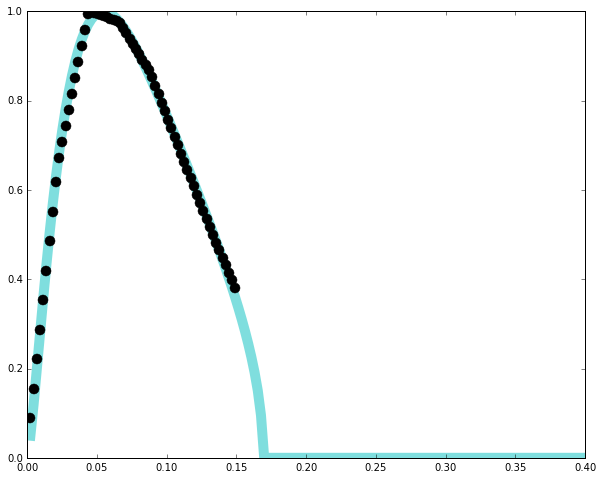

In [310]:
plt.plot(freq_ideal, filt_ideal/np.nanmax(filt_ideal), color='c', linewidth=10, alpha=0.5)
plt.plot(freqs, model_fft, 'k.', linewidth=2, markersize=20)
plt.xlim([0,.4])

In [311]:
lowerer_freqs = [f for f in lower_freqs if f < 0.15]
freqs, ideal_fft, center_weight, surround_weight, center_width = fit_ideal_ama_only(lowerer_freqs, 
                                                                                                    ideal_filter_interp(lowerer_freqs), returnFlag='all')
print('Horizontal weight is %f, Amacrine weight is %f' %(0.0, 1.0))
print('Center weight is %f, Surround weight is %f' %(center_weight, surround_weight))
print('Center is %f std wide' %center_width)

Horizontal weight is 0.000000, Amacrine weight is 1.000000
Center weight is 3006.352512, Surround weight is 291.468208
Center is 1.896491 std wide


/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:758: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_freqs_one_sided = np.linspace(0, 1./(2*spacing), len(rf_f_one_sided))


(0, 0.4)

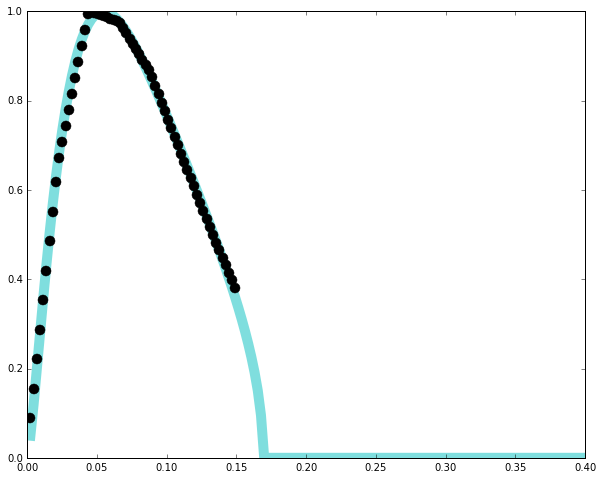

In [312]:
plt.plot(freq_ideal, filt_ideal/np.nanmax(filt_ideal), color='c', linewidth=10, alpha=0.5)
plt.plot(freqs, model_fft, 'k.', linewidth=2, markersize=20)
plt.xlim([0,.4])

The relative error from this choice of Lagrangian multiplier is 2.14200077084e-07.


/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


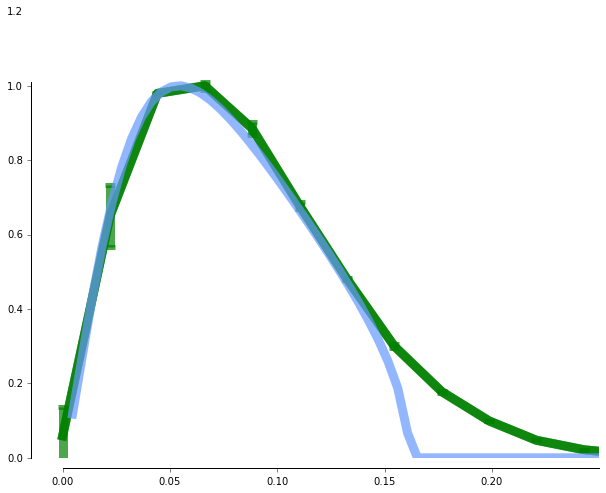

In [313]:
freq_ideal, filt_ideal, freq_expt_h, filt_expt_h, h_freqs, h_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                     inputNoise=0.12, outputNoise=0.35,
                                                                     center_weighting=3006.352512, surround_weighting=291.468208,
                                                                     horz_weighting=0.0, ama_weighting=1.0,
                                                                     center_width=1.896491,
                                                                     returnFlag=True, xlimit=[-0.01,0.25], 
                                                                     numPoints=5000, plotFlag='aggregate',
                                                                     aggregateColor='g', statistics=True)

# Okay, so my previous curve-fitting procedure was not the best. When I use curve_fit, I can obtain a pretty-close curve with only one inhibitory cell-type. What happens if I fix the center width?

In [329]:
ganglion_rfs = load_ganglion_cells()
interp_ganglions     = get_interp(ganglion_rfs, nPoints = 100, mode='valid')
aligned_ganglion_rfs = np.vstack([y for x,y in interp_ganglions])
valid_space          = interp_ganglions[0][0]

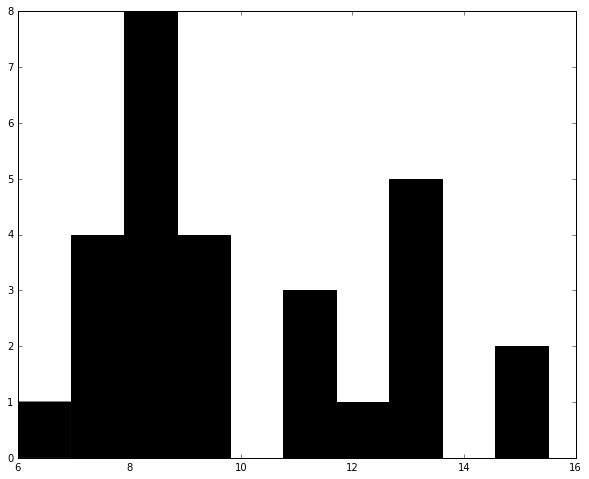

In [338]:
widths = []
for rf in aligned_ganglion_rfs:
    pos_inds = np.array([i for i in range(len(rf)) if rf[i] > 0])
    lefties  = 48 - pos_inds
    left_width  = np.min(lefties[lefties>=0])
    right_width = np.min(-lefties[lefties<0])
    #widths.append(np.min(abs(48 - pos_inds)))
    widths.append(np.mean([left_width, right_width]))
counts, bins, _ = hist(widths, color='k')

PCA(copy=True, n_components=3, whiten=False)

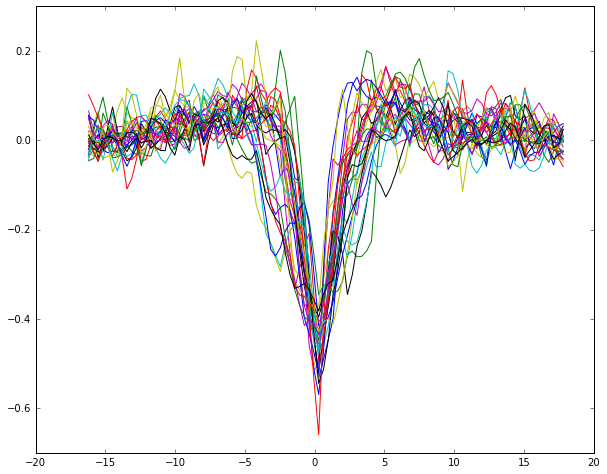

In [339]:
interp_ganglions     = get_interp(ganglion_rfs, nPoints = 100, mode='valid')
aligned_ganglion_rfs = np.vstack([y for x,y in interp_ganglions])
valid_space          = interp_ganglions[0][0]

plot(valid_space, aligned_ganglion_rfs.T)

pca = PCA(n_components=3)
pca.fit(aligned_ganglion_rfs)

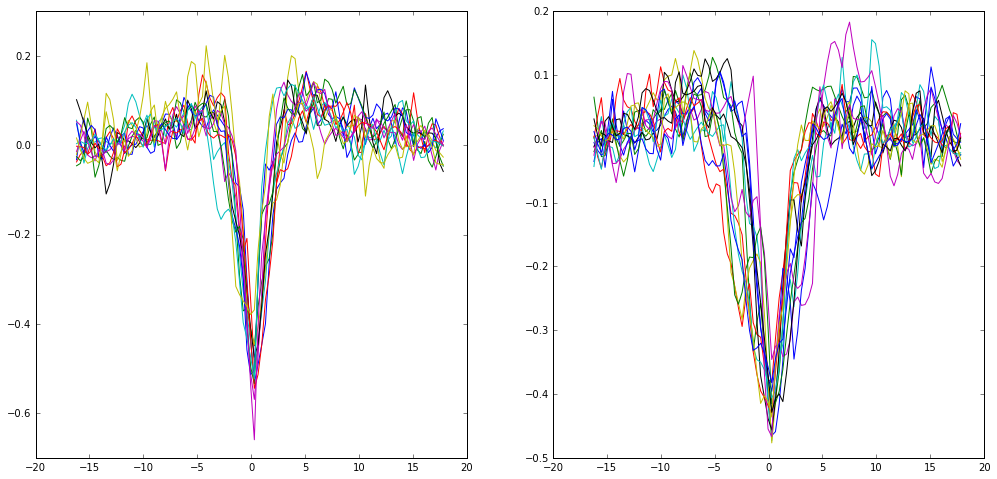

In [340]:
fig = gcf()
fig.set_size_inches((17,8))
subplot(1,2,1)
_ = plot(valid_space, aligned_ganglion_rfs[np.array(widths) < 9].T)
subplot(1,2,2)
_ = plot(valid_space, aligned_ganglion_rfs[np.array(widths) >= 9].T)

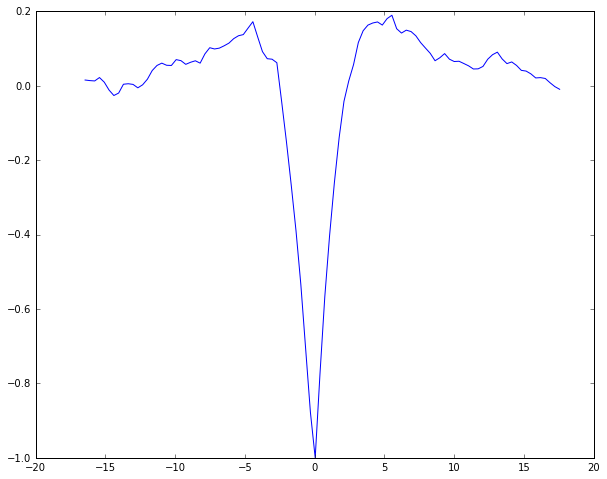

In [345]:
narrow_ganglions = aligned_ganglion_rfs[np.array(widths) < 9]
mean_narrow_ganglion = np.mean(narrow_ganglions, axis=0)
plot(valid_space-.25, mean_narrow_ganglion/np.max(abs(mean_narrow_ganglion)))
# plot(valid_space, diff_gaussians(valid_space, 1.3, 5, 3), 'k')
#plot(valid_space, gaussian(x=valid_space))

In [398]:
def diff_of_gaussians(space, center_width, surround_width, center_strength, surround_strength):
    center = gaussian(x=space, sigma=center_width, mu=0)
    surround = gaussian(x=space, sigma=surround_width, mu=0)
    difference = center_strength * center - surround_strength * surround
    return difference

In [399]:
popt, pcov = curve_fit(diff_of_gaussians, valid_space-.25, mean_narrow_ganglion, p0=[1.3, 7.4, -11, -60])

In [400]:
popt

array([  1.18498983,   7.39968434,  -4.60064203, -29.69700778])

In [401]:
difference = diff_of_gaussians(valid_space-.25, *popt)

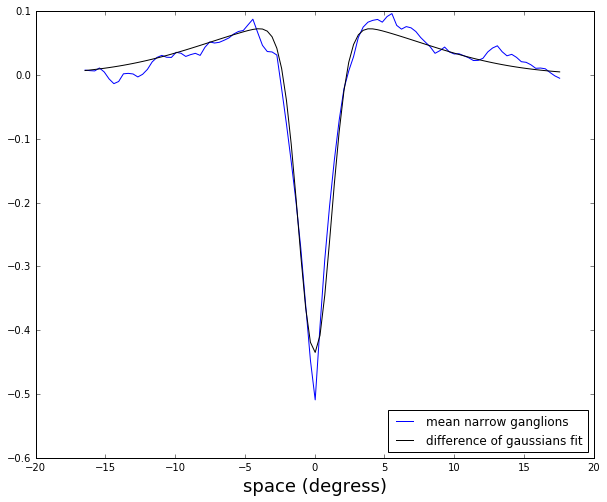

In [404]:
plot(valid_space-.25, mean_narrow_ganglion, label='mean narrow ganglions')
plot(valid_space-.25, difference, 'k', label='difference of gaussians fit')
plt.legend(loc='lower right')
plt.xlabel('space (degress)', fontsize=18)

## So the center width is 1.185 std (degrees)